In [ ]:
#Source : https://github.com/mokeam/malware-analysis/blob/master/scripts/Malware_Classification_Model.py

In [2]:


import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression as LG
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score as acc
from sklearn.metrics import precision_score as precision
from sklearn.metrics import recall_score as recall
from sklearn.metrics import roc_auc_score as auc_score
from sklearn.utils import resample
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix as cm

training_data = pd.read_csv('feature_vectors_data.csv')

df_majority = training_data[training_data.output == 0]
df_minority = training_data[training_data.output == 1]

# Upsampling minority class
df_minority_upsampled = resample(df_minority,replace=True,n_samples=123453,random_state=123)
df_upsampled = pd.concat([df_majority,df_minority_upsampled])

print(df_upsampled)
#Downsampling majority class
df_majority_downsampled = resample(df_majority,replace=False,n_samples=len(df_minority),random_state=123)
df_downsampled = pd.concat([df_majority_downsampled,df_minority])

# Encoding our output value [True =1. False = 0]
label_encoder = LabelEncoder()

       Unnamed: 0  ... output
0               0  ...    0.0
1               1  ...    0.0
2               2  ...    0.0
3               3  ...    0.0
4               4  ...    0.0
...           ...  ...    ...
10613       10613  ...    1.0
18258       18258  ...    1.0
1835         1835  ...    1.0
29647       29647  ...    1.0
32598       32598  ...    1.0

[167638 rows x 11 columns]


Figure 1


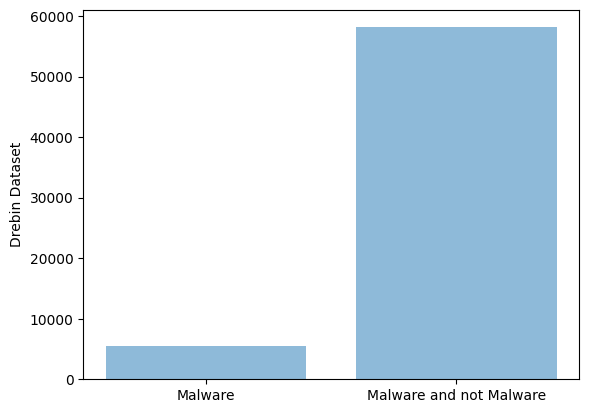

In [5]:
import matplotlib.pyplot as plt; plt.rcdefaults()
import numpy as np
import matplotlib.pyplot as plt

print("Figure 1")

data = pd.read_csv('sha256_family.csv')
sha_column = data["sha256"]

feature_vectors_data = pd.read_csv('feature_vectors_data.csv')
sha256_data = feature_vectors_data['sha256']


objects = ('Malware','Malware and not Malware')

y_pos = np.arange(len(objects))
performance = [len(sha_column),len(sha256_data)]

plt.bar(y_pos, performance, align='center', alpha=0.5)
plt.xticks(y_pos, objects)
plt.ylabel('Drebin Dataset')

plt.show()


Figure 2


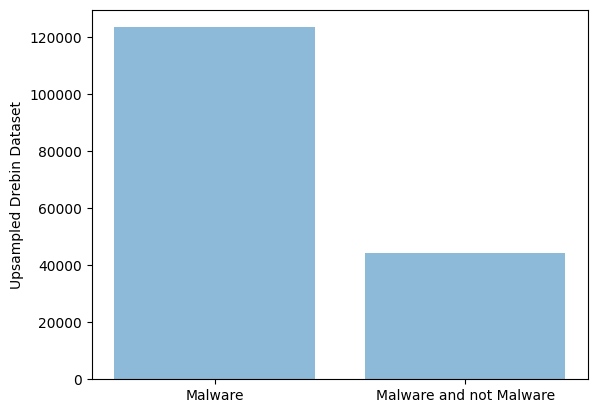

In [8]:
# Upsampling minority class
print("Figure 2")
objects = ('Malware','Malware and not Malware')

y_pos = np.arange(len(objects))
performance = [len(df_upsampled[df_upsampled.output ==1]),len(df_upsampled[df_upsampled.output ==0])]

plt.bar(y_pos, performance, align='center', alpha=0.5)
plt.xticks(y_pos, objects)
plt.ylabel('Upsampled Drebin Dataset')

plt.show()


Logistic Regression for Upsampled dataset:
 
accuracy: 0.852481507993319
precision: 0.8777046095954845
recall: 0.9297333692431996
auc: 0.7821436941946129
 
Figure 3


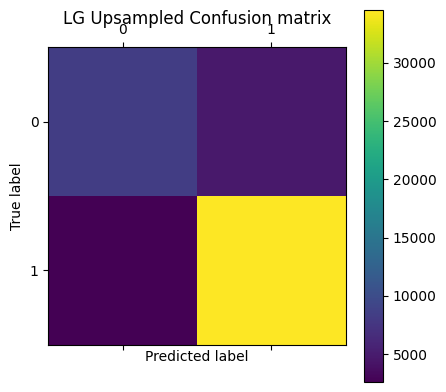

----------------------------------------------------
Random Forest Classifier for Upsampled dataset:
 
accuracy:  0.9963413664201066
precision:  0.9954406479643834
recall:  0.9996229464045246
auc:  0.9933534880936162
 
Figure 4


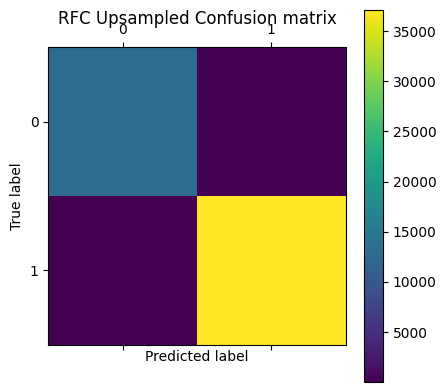

In [9]:
from sklearn.metrics import accuracy_score as acc
from sklearn.metrics import precision_score as precision
from sklearn.metrics import recall_score as recall
from sklearn.metrics import roc_auc_score as auc_score

# Encoding upsampled dataset
output_integer_encoded  = label_encoder.fit_transform(df_upsampled['output'])

#Upsampling the minority class
#Splitting my data in ratio of 30:70 percent
features_train, features_test, labels_train, labels_test = train_test_split(df_upsampled.iloc[:,2:10], output_integer_encoded, test_size=0.3, random_state=0)

# Train our model with LogisticRegression
clf = LG().fit(features_train, labels_train)

# Model Prediction
LG_predictions_class_test = clf.predict(features_test)

print("Logistic Regression for Upsampled dataset:")
print(" ")
# Compute Model Accuracy
LG_accuracy = acc(labels_test, LG_predictions_class_test)
print('accuracy:', LG_accuracy)

# Compute Model Precision
LG_precision = precision(labels_test, LG_predictions_class_test)
print('precision:', LG_precision)

# Compute Model Recall
LG_recall = recall(labels_test, LG_predictions_class_test)
print('recall:', LG_recall)

# Compute Model ROC AUC Score
LG_auc = auc_score(labels_test, LG_predictions_class_test)
print('auc:', LG_auc)

print(" ")
print("Figure 3")
LG_cm = cm(labels_test,LG_predictions_class_test)

# Show confusion matrix in a separate window
plt.matshow(LG_cm)
plt.title('LG Upsampled Confusion matrix')
plt.colorbar()
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()


print("----------------------------------------------------")

# Train model with Random Forest Classifier
RFC_clf = RandomForestClassifier()
RFC_clf = RFC_clf.fit(features_train, labels_train)


# Model Prediction
RFC_predictions_class_test = RFC_clf.predict(features_test)

print("Random Forest Classifier for Upsampled dataset:")
print(" ")
# Compute Model Accuracy
RFC_accuracy = acc(labels_test, RFC_predictions_class_test)
print('accuracy: ', RFC_accuracy)

# Compute Model Precision
RFC_precision = precision(labels_test, RFC_predictions_class_test)
print('precision: ', RFC_precision)

# Compute Model Recall
RFC_recall = recall(labels_test, RFC_predictions_class_test)
print('recall: ', RFC_recall)

# Compute Model ROC AUC Score
RFC_auc = auc_score(labels_test, RFC_predictions_class_test)
print('auc: ', RFC_auc)

RFC_cm = cm(labels_test,RFC_predictions_class_test)

print(" ")
print("Figure 4")

# Show confusion matrix in a separate window
plt.matshow(RFC_cm)
plt.title('RFC Upsampled Confusion matrix')
plt.colorbar()
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()




Figure 5


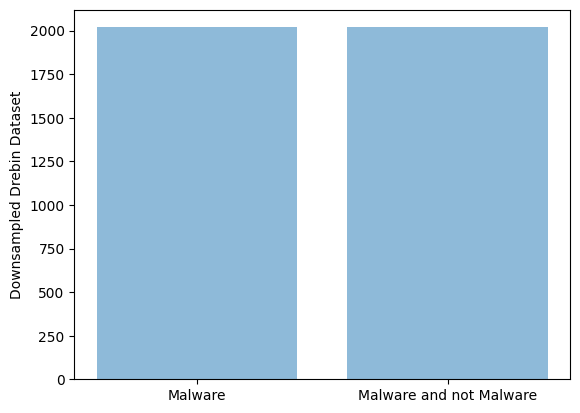

In [10]:
# Downsampling majority class
print("Figure 5")
objects = ('Malware','Malware and not Malware')

y_pos = np.arange(len(objects))
performance = [len(df_downsampled[df_downsampled.output ==1]),len(df_downsampled[df_downsampled.output ==0])]

plt.bar(y_pos, performance, align='center', alpha=0.5)
plt.xticks(y_pos, objects)
plt.ylabel('Downsampled Drebin Dataset')

plt.show()


Logistic Regression for Downsampled dataset:
 
accuracy: 0.8176567656765676
precision: 0.8620689655172413
recall: 0.7512520868113522
auc: 0.8168984740745179
 
Figure 6


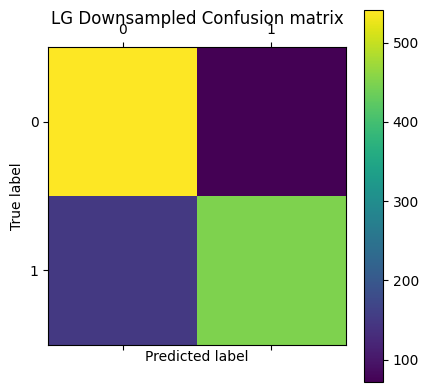

----------------------------------------------------
Random Forest Classifier for Downsampled dataset:
 
accuracy: 0.9117161716171617
precision: 0.9155405405405406
recall: 0.9048414023372288
auc: 0.9116376669108657
 
Figure 7


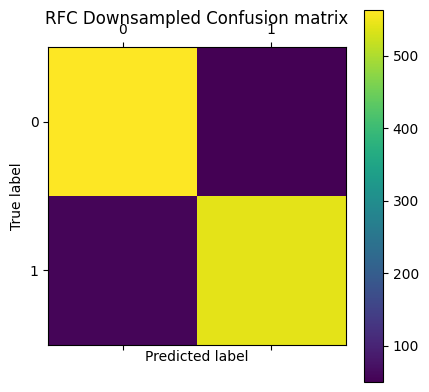

In [11]:
from sklearn.metrics import accuracy_score as acc
from sklearn.metrics import precision_score as precision
from sklearn.metrics import recall_score as recall
from sklearn.metrics import roc_auc_score as auc_score

# Encoding downsampled dataset
output_integer_encoded  = label_encoder.fit_transform(df_downsampled['output'])

# Downsampling the majority class
# Splitting my data in ratio of 30:70 percent
features_train, features_test, labels_train, labels_test = train_test_split(df_downsampled.iloc[:,2:10], output_integer_encoded, test_size=0.3, random_state=0)

# Train our model with LogisticRegression
clf = LG().fit(features_train, labels_train)

# Model Prediction
LG_predictions_class_test = clf.predict(features_test)

print("Logistic Regression for Downsampled dataset:")
print(" ")
# Compute Model Accuracy
LG_accuracy = acc(labels_test, LG_predictions_class_test)
print('accuracy:', LG_accuracy)

# Compute Model Precision
LG_precision = precision(labels_test, LG_predictions_class_test)
print('precision:', LG_precision)

# Compute Model Recall
LG_recall = recall(labels_test, LG_predictions_class_test)
print('recall:', LG_recall)

# Compute Model ROC AUC Score
LG_auc = auc_score(labels_test, LG_predictions_class_test)
print('auc:', LG_auc)

LG_cm = cm(labels_test,LG_predictions_class_test)

print(" ")
print("Figure 6")

# Show confusion matrix in a separate window
plt.matshow(LG_cm)
plt.title('LG Downsampled Confusion matrix')
plt.colorbar()
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()


print("----------------------------------------------------")

# Train model with Random Forest Classifier
RFC_clf = RandomForestClassifier()
RFC_clf = RFC_clf.fit(features_train, labels_train)


# Model Prediction
RFC_predictions_class_test = RFC_clf.predict(features_test)

print("Random Forest Classifier for Downsampled dataset:")
print(" ")
# Compute Model Accuracy
RFC_accuracy = acc(labels_test, RFC_predictions_class_test)
print('accuracy:', RFC_accuracy)

# Compute Model Precision
RFC_precision = precision(labels_test, RFC_predictions_class_test)
print('precision:', RFC_precision)

# Compute Model Recall
RFC_recall = recall(labels_test, RFC_predictions_class_test)
print('recall:', RFC_recall)

# Compute Model ROC AUC Score
RFC_auc = auc_score(labels_test, RFC_predictions_class_test)
print('auc:', RFC_auc)

RFC_cm = cm(labels_test,RFC_predictions_class_test)

print(" ")
print("Figure 7")

# Show confusion matrix in a separate window
plt.matshow(RFC_cm)
plt.title('RFC Downsampled Confusion matrix')
plt.colorbar()
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()